# KNN algorithm on Python #

KNN algorithm is simple. To explain it, we can use a simple example. Two classes of something, like an animal. And we have two features, let's say heigth and width. And we have a new instance, and we want to predict which class it belongs to based on its two features, height and width.

We can plot all the data in a 2D cartesian plane, X-axis and Y-axis showing the value of two features, height and width. And the points are the instances of the animals. Colors of the points show the class or species of the animal. This is the training data; we have already everything determined. Here the training data is clean.

Then we put a new point on the plan, this is the new instance. **To predict which class the new instance belongs to, we look at which class the nearest points belongs to.** This is the basics of KNN algorithm.

The *K* value is an integer. It must be at least one. If K is one, then we look which class the nearest point (instance) belongs to, and predict that the new point (instance) belongs to the same class.

If K is for example 5, then we look 5 of the nearest points (instances) to the new point (instance), count the which class is the most frequent among those 5 points (instances), and then predict that the new point (instance) belongs to that class.

This is how KNN works simply. There are different ways to measure distance. There can be more than 2 classes, and there can be more than 2 features. 

In this example used in the assignment, we have 3 classes, and 4 features. 4D room is not easy to imagine. But the distance is not distance in room, but distance in data. So distance in 4D, 5D, XD data (data with 4, 5 or X features) is calculated similar to distance in cartesian 2D plane or 3D room.

And in this example we use Eucledian distance to calculate distance between the new point and any existing point.

***In this Python implementation*** we have used 3 functions to implement the algorithm, then visualized the new point in a plot diagram at the end using Seaborn. First function is used inside second function, and second function is used inside third function. Third function is the main function.

In [1]:
import warnings
# This is to ignore error when plotting at the end, the error is about zero variance
# because the new point is only one.
warnings.filterwarnings('ignore') 
import pandas as pd
import math
import heapq



The first one is used to calculate distance. It's calculating Euclidean distance between two points. In our example dataset each instance has 4 features (sepal length, sepal width, petal length and petal width).

The Eucladean distance can be described like this:
SquareRoot(SUM((feature of existing poing - feature of new point)^2))

Example:
p_1 is sepal length of any existing point, q_1 is sepal lenght of new point,
p_2 is sepal length of any existing point, q_2 is sepal lenght of new point and so on.

Eucledian distance between two points will be like:

root((p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2 + (p_4 - q_4)^2)

This is what we do in the function below using iteration inside math.fsum() in python. We iterate through each feature of two points.


In [11]:
def calculate_distance(datarow, new_point):
    return math.sqrt(math.fsum(math.pow((px - qx), 2) for px, qx in zip(datarow, new_point)))
    

The second function below uses the function above. It gets the training dataset and *new_point* as input. Then it calculates the distance between the new data point with each row in the training data set, and saves the distance in a heap, along with the name of the plant class (species), in a tuple. 

Each tuple countains two values:
1. The Eucledian distance between two points, the new data point and one of the existing data points
2. The name of the species the existing data points belongs to

The reason we use heap is to make all the data put into the list sorted, so it's easy to elements with least distance in the next step. While I don't know the exact calculations, it seems to be more effective to use heap and put them into it sorted, than to put all 150 elements in a list randomly, then sort all those 150 elements.

In [12]:
def find_nearest_neighbor(dataset, new_point):
    points = list()
    heapq.heapify(points)
    for row in dataset.iterrows():
        heapq.heappush(points, (calculate_distance(row[1][0:-1], new_point), row[1][-1]))
    return points
    

This is the prediction function. It uses the function above (which uses the first function), also it's the main function that uses KNN algorithm to predict new data point.

What we do here is:
First using the function above we build a sorted heap of tuples containig distances between new point and each existing point, and the name of the species of the existing points.

Then we build a dict named *K_neighbors*.

Based on the value of the K, we itearete K times. We save those inside a dictionary named *K_neighbours*.
When we pop from the heap, we get the element with least value (tuple with least Eucledian distance), and that value is removed from the heap. So in the next iteration (next pop) we get the second least element from the dataset (since the least element from the dataset is popped out and removed from the heap). So we pop the K number of tuples from the heap.

We use `plant_class = heapq.heappop(points)[1]` here, so we get just the name of species of the point with least distance to the, which is also the point with least Eucledian distance. We save the name into *plant_class*.

We use the name of the species as keys in the dictionary, and the number of occurrences as values. We first check if the name exists as a key with `if plant_class in K__neighbors.keys()` in the dictionary. If it not exists, we make a new key and append the value 1 to it. If it already exists, we increase the value using `+= 1`. 

Now *K_neighbors* is a dictionary where keys are the names of the species, and values of those keys are number of their occurrence among the K nearest neighbors to the new point (or new instance).

Then we just get the key with maximum value, save it to *plant_class*. It's the class name that's most frequent in those K points whith least distance to the new data point. Then we return the name of that species.

In [13]:
def prediction(dataset, new_point, K):
    points = find_nearest_neighbor(dataset, new_point)
    K_neighbors = dict()
    for i in range(K):
        plant_class = heapq.heappop(points)[1]
        if plant_class in K_neighbors.keys():
            K_neighbors[plant_class] += 1
        else:
            K_neighbors[plant_class] = 1
    plant_class = max(K_neighbors, key=K_neighbors.get)
    return plant_class


Here we just get the example data. In this example the data is clean and prepared to be used, so we don't need to prepare our dataset. Also there's no missing values or stuff like that, and the structure is perfectly fit to be used by our functions.

In the assignment text teacher recommends to turn all the names into integers. But since we don't use those integers in any claculation in this algorithm, I decided to use the names as names (strings) to make it simpler. Thus I commented out the factorize part.

Below that we can see a little part of the dataframe.

In [14]:
# Iris dataset link
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df_iris = pd.read_csv(URL,
                      header=None,
                      names=['sepal length', 'sepal width',
                             'petal length', 'petal width', 'species'])
df_iris
# df_iris['class'] = pd.factorize(df_iris['class'])
# df_iris

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Here we set the new data point *new_dp* and the value of K. **In my tests where tested K from 1 to 50, the new data point belongs to the same class, which is Iris-setosa**.

The value of the K determines how many of the "training data points with least distance to new data point" we choose, and in prediction we choose the class that's in highest occurring among those K data points chosen.

The reason I did chose a high K value of 20 is the data points in Iris dataset can be very close to each other based on some features (as seen in the plot at the end). But they're not very close based on other features. So I thought 20 is enough.

In [15]:
new_dp = [7.0, 3.1, 1.3, 0.7]

K = 20

At the end we just run our code with the values and predict the class. The predicted class is ***Iris Setosa***.

In [18]:
prediction(df_iris, new_dp, K)

'Iris-setosa'

Let's draw plots using Matplot and pairplot of Seaborn and see where the new point lies. The red X is the new point (you need to wait a little as it takes some time to draw).

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 432x288 with 0 Axes>

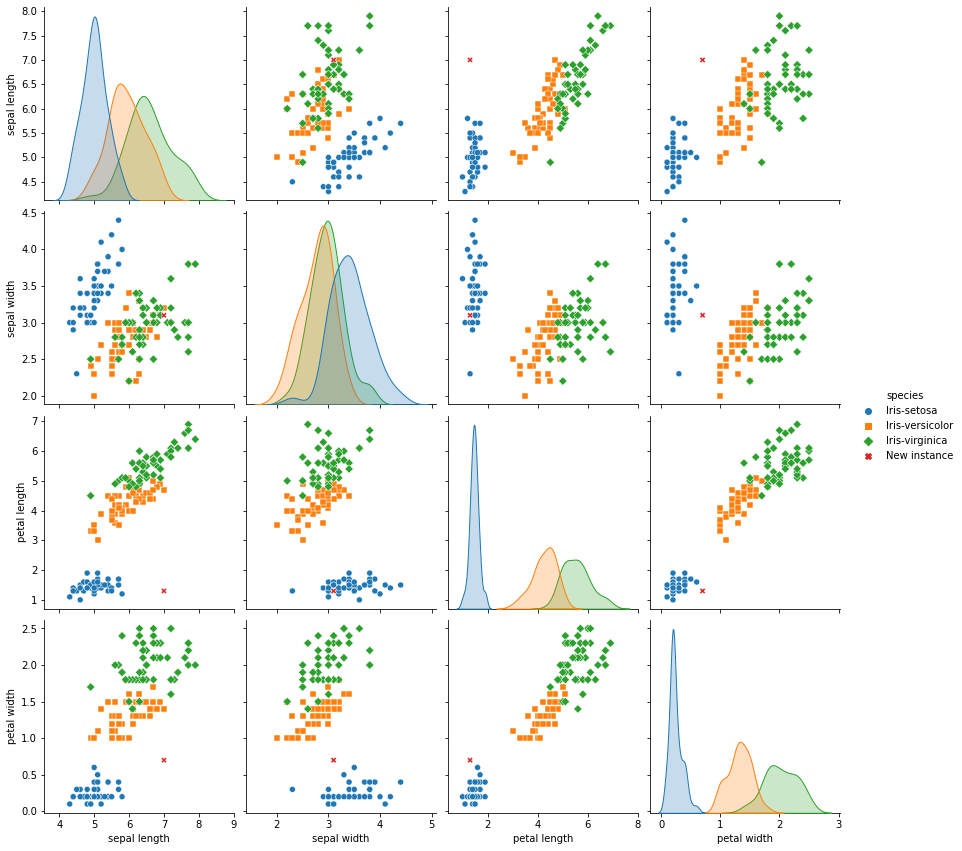

In [20]:
# Preparing the new point
new_point = new_dp.copy()
new_point.append('New instance')
a_series = pd.Series(new_point, index = df_iris.columns)

# Using pairplot of Seaborn to draw multiple plots
plt.figure()
sns.pairplot(df_iris.append(a_series, ignore_index=True), hue = "species", height=3, markers=["o", "s", "D", "X"])
plt.show()

As we see, the new point is more close to blue dots (Iris Setosa) than other species. 

As we can see, in two of the planes it's very close to other two species. In six of the planes it stays between them. In three of the planes it's very close to blue dots (Iris Setosa).